In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.float_format ='{:,.3f}'.format

Два неочищенных набора данных, соединение таблиц лежит в последнем столбце первой таблице в форомате json - парсила данные из json, добавляя в итоговую таблицу и соединяла со второй, чтобы в итоговой таблице можно было посмотреть данные по поставщикам/товарам/заказчикам, корреляции спроса на товар и даты заключения контракта.

## Import data

In [277]:
# pd.read_excel('data/Контракты_Иркутск.xlsx')
# pd.read_excel('data/СТЕ_Иркутск.xlsx')
df_cte = pd.read_csv("data/cte.csv")
df = pd.read_csv("data/data.csv")

del df_cte['Unnamed: 0']
del df['Unnamed: 0']
df_cte.columns = ['id_cte', 'name_cte', 'category', 'code', 'characteristics']
df.columns = ['number', 'date_kpp', 'date_concl', 'price', 'inn_ord','kpp_ord', 'name_ord', 'inn_cust', 
             'kpp_cust', 'name_cust', 'cte']

In [1]:
! pip install pandoc


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [278]:
df.head(10)

,number,date_kpp,date_concl,price,inn_ord,kpp_ord,name_ord,inn_cust,kpp_cust,name_cust,cte
0,10/2019-СГЗ,2019-06-13 17:07:08.753,2019-06-18 00:00:00.000,"21,970.000",7709043455,770901001,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ДОПОЛНИТЕ...,5009062762,"500,901,001.000","ООО ""ОФИСМАГ""","[{""Id"":1226040,""Quantity"":100.00000,""Amount"":2..."
1,642-МЗ-44/19,2019-06-13 10:46:31.197,2019-06-18 00:00:00.000,"85,312.000",7719047184,771901001,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХР...,7725696613,"772,501,001.000","ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""МОСНАБ""","[{""Id"":null,""Quantity"":4.00000,""Amount"":42656...."
2,74-19,2019-06-13 15:34:06.630,2019-06-18 00:00:00.000,"26,638.340",7727597777,772701001,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ГОРОДА МО...,7724456672,"772,401,001.000","ООО ""Жизнь офиса""","[{""Id"":null,""Quantity"":1.00000,""Amount"":26638...."
3,И-1200/19,2019-06-11 15:07:29.147,2019-06-18 00:00:00.000,"82,386.000",7714338609,771401001,ГОСУДАРСТВЕННОЕ КАЗЕННОЕ УЧРЕЖДЕНИЕ ГОРОДА МОС...,503224250310,NaN,Индивидуальный предприниматель Кручинина Екате...,"[{""Id"":1405814,""Quantity"":120.00000,""Amount"":8..."
4,639-МЗ-44/19,2019-06-13 10:55:03.087,2019-06-18 00:00:00.000,"28,362.000",7719047184,771901001,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХР...,7706771569,"772,701,001.000","ООО ""ПРИНСИПАЛ-БМ""","[{""Id"":null,""Quantity"":300.00000,""Amount"":2836..."
5,06-19-142,2019-06-11 15:43:00.223,2019-06-18 00:00:00.000,"31,044.000",7715446501,771501001,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ОБЩЕОБРАЗОВАТЕЛЬНОЕ ...,7724310183,"772,401,001.000",Общество с ограниченной ответственностью «ФУРАМА»,"[{""Id"":null,""Quantity"":5.00000,""Amount"":31044...."
6,46-2019,2019-06-13 12:42:50.313,2019-06-18 00:00:00.000,"4,046.900",7702078650,770201001,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ КУЛЬТУРЫ ...,772023045527,NaN,ИП Стадальникас Дмитрий Валерьевич,"[{""Id"":1430277,""Quantity"":2.00000,""Amount"":404..."
7,275-1/19,2019-06-13 08:52:25.737,2019-06-18 00:00:00.000,"51,291.680",7727656790,771401001,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ГОРОДА МО...,772747520495,NaN,ИП Пивкин Даниил Владимирович,"[{""Id"":null,""Quantity"":32.00000,""Amount"":8831...."
8,3131205,2019-06-11 16:04:28.093,2019-06-18 00:00:00.000,"81,782.700",7714338609,771401001,ГОСУДАРСТВЕННОЕ КАЗЕННОЕ УЧРЕЖДЕНИЕ ГОРОДА МОС...,7709023402,"770,901,001.000","ЗАО ФИРМА ""ХОПЕР""","[{""Id"":null,""Quantity"":10.00000,""Amount"":27175..."
9,103/06-2019,2019-06-06 11:19:48.130,2019-06-18 00:00:00.000,"47,151.480",7733126624,773301001,Государственное бюджетное общеобразовательное ...,7707769273,"773,301,001.000","ООО ""ТЕХАЛЬЯНС""","[{""Id"":1419553,""Quantity"":1.00000,""Amount"":471..."


In [279]:
df.describe()

,price,inn_ord,kpp_ord,inn_cust,kpp_cust
count,"414,993.000","414,993.000","414,993.000","414,993.000","289,520.000"
mean,"114,219.862","7,655,416,395.010","768,780,260.985","191,344,325,774.262","710,291,694.174"
std,"212,634.359","566,882,761.070","30,413,010.277","300,270,405,720.956","126,857,437.809"
min,0.010,"5,002,001,584.000","500,201,001.000","105,061,297.000","10,501,001.000"
25%,"15,666.610","7,714,079,640.000","771,501,001.000","7,712,011,904.000","770,101,001.000"
50%,"48,689.190","7,721,809,746.000","772,201,001.000","7,727,560,110.000","771,801,001.000"
75%,"126,450.000","7,729,415,535.000","772,901,001.000","463,307,681,717.000","772,601,001.000"
max,"2,989,360.000","9,729,068,476.000","997,650,001.000","990,199,065,793.000","997,750,001.000"


In [280]:
print('total client:', df.inn_ord.nunique())
print('total producter:', df_cte.code.nunique())

total client: 2424
total producter: 5307


In [281]:
df_cte.head(10)

,id_cte,name_cte,category,code,characteristics
0,1153097,мяч футбольный MIKASA REGATEADOR5-G,Мячи футбольные,01.08.01.13.01,"[{""Name"":""Модель"",""Id"":283795036,""Value"":""REGA..."
1,1153130,мяч волейбольный Gala Pro-Line 10 FIVB,Мячи волейбольные,01.08.01.14.03.01,"[{""Name"":""Марка"",""Id"":284249992,""Value"":""Gala""..."
2,1153163,мяч волейбольный Mikasa MVA380K-OBL,Мячи волейбольные,01.08.01.14.03.01,"[{""Name"":""Марка"",""Id"":284249802,""Value"":""MIKAS..."
3,1153174,мяч волейбольный Wilson Super Soft Play,Мячи волейбольные,01.08.01.14.03.01,"[{""Name"":""Марка"",""Id"":284246959,""Value"":""WILSO..."
4,1159300,Gutrend комплект расходных материалов для FUN ...,"Расходные материалы, комплектующие для прочего...",01.20.10.99,"[{""Name"":""Тип"",""Id"":284280400,""Value"":""Расходн..."
5,1159303,Neolux FSM-05 набор фильтров для пылесоса Samsung,Фильтр для пылесоса,01.20.10.03,"[{""Name"":""Тип"",""Id"":284280428,""Value"":""Расходн..."
6,1159344,Jura 62536 жидкость для чистки автокаппучинато...,"Расходные материалы, комплектующие для прочего...",01.20.10.99,"[{""Name"":""Тип"",""Id"":284280734,""Value"":""Средств..."
7,1159352,Karcher AD 3.200 1.629-662.0 промышленный пылесос,Пылесос,01.20.03.01,"[{""Name"":""Тип"",""Id"":284200061,""Value"":""Пылесос..."
8,1159363,Vitek VT-1886(B) пылесос,Пылесос,01.20.03.01,"[{""Name"":""Тип"",""Id"":284200233,""Value"":""Пылесос..."
9,1159379,Philips FC8471/01 PowerPro Compact безмешковый...,Пылесос,01.20.03.01,"[{""Name"":""Тип"",""Id"":284200483,""Value"":""Пылесос..."


In [282]:
print('total :', df_cte.id_cte.nunique())
print('unique GKPZ code:', df_cte.code.nunique())
print('category amount:', df_cte.category.nunique())

total : 356575
unique GKPZ code: 5307
category amount: 6240


### Регионы поставщиков

In [308]:
df['region_ord'] = (df.kpp_ord / 10000000).astype('int')
df['kpp_cust'] = df.kpp_cust.fillna(0)
df['region_cust'] = (df.kpp_cust / 10000000).astype('int')
ord_reg = df.groupby(['region_cust'])['price'].agg('sum').astype('uint')
df_ord = pd.DataFrame({'region':ord_reg.index, 'sum':ord_reg.values})
df_ord.sort_values(by='sum', ascending=False)

,region,sum
72,77,2712970750
61,66,1138380774
0,0,1100173668
46,50,684950975
73,78,559843034
...,...,...
23,25,487729
9,9,465405
42,45,403932
4,4,267850


### Объединенная таблица товаров заказа и cte

In [284]:
df_contr = df['cte'].explode()
df_f = df[['number', 'date_concl', 'name_ord', 'inn_cust', 'name_cust']].join(pd.DataFrame(df_contr.tolist(), df_contr.index)\
                         .assign(cc=lambda x: x.groupby(level=0).cumcount()+1)\
                         .set_index('cc', append=True)\
                         .stack()\
                         .unstack(level=[-2,-1])\
                         .droplevel(0, axis=1), 
                       how='left')
df_f.columns = ['number','date_concl', 'name_ord','inn_cust', 'name_cust', 'cte']

In [285]:
item = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for i in item:
    df_f['%s' %i] = df_f.cte.str.split('},{').str.get(i - 1)

In [286]:
df_f['id'] = df_f['1'].str.split(',').str.get(0).str.replace('"Id":', '')
df_f['id'] = df_f['id'].str.strip('[{').str.replace('null', '0').astype('int')
df_f['quantity'] = df_f['1'].str.split(',').str.get(1).str.replace('"Quantity":', '').astype('float')
df_f['amount'] = df_f['1'].str.split(',').str.get(2).str.replace('"Amount":', '').str.strip('}]').astype('float')

In [287]:
df_one = df_f
df_one = df_one.drop(['cte', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], axis=1)

In [288]:
df_one.to_csv('data/try.csv', index=False, header=False)

In [289]:
item = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for i in item:
    df_f = df_f.drop(df_f[df_f['%s' %i].isnull()].index)
    df_f['id'] = df_f['%s' %i].str.split(',').str.get(0).str.replace('"Id":', '')
    df_f['id'] = df_f['id'].str.strip('[{').str.replace('null', '0').astype('int')
    df_f['quantity'] = df_f['%s' %i].str.split(',').str.get(1).str.replace('"Quantity":', '').astype('float')
    df_f['amount'] = df_f['%s' %i].str.split(',').str.get(2).str.replace('"Amount":', '').str.strip('}]').astype('float')
                            
    df_new = df_f
    df_new = df_new.drop(['cte', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], axis=1)
    df_new = df_new.reset_index(drop=True)
    df_new.to_csv('data/try.csv', mode='a', index=False, header=False)

In [290]:
df_total = pd.read_csv('data/try.csv')
df_total.columns = ['number','date_concl', 'name_ord','inn_cust', 'name_cust', 'id_cte', 'quantity', 'amount']

In [291]:
df_total = df_total.merge(df_cte[['id_cte','code']], on='id_cte', how='inner')

In [292]:
df_total = df_total.dropna()

In [293]:
df_total.head(10)

,number,date_concl,name_ord,inn_cust,name_cust,id_cte,quantity,amount,code
0,И-1200/19,2019-06-18 00:00:00.000,ГОСУДАРСТВЕННОЕ КАЗЕННОЕ УЧРЕЖДЕНИЕ ГОРОДА МОС...,503224250310,Индивидуальный предприниматель Кручинина Екате...,1405814,120.000,"82,386.000",01.02.10.42.05.01
1,46-2019,2019-06-18 00:00:00.000,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ КУЛЬТУРЫ ...,772023045527,ИП Стадальникас Дмитрий Валерьевич,1430277,2.000,"4,046.900",01.16.17.02
2,101-20,2020-04-10 00:00:00.000,Государственное бюджетное образовательное учре...,773506776460,Индивидуальный предприниматель Горин Василий Н...,1430277,4.000,"9,210.480",01.16.17.02
3,164-ШМК-2019,2019-11-22 00:00:00.000,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ОБЩЕОБРАЗОВАТЕЛЬНОЕ ...,772023045527,ИП Стадальникас Дмитрий Валерьевич,1430277,10.000,"24,273.600",01.16.17.02
4,304-МА-2019,2019-12-03 00:00:00.000,Государственное бюджетное общеобразовательное ...,772023045527,ИП Стадальникас Дмитрий Валерьевич,1430277,11.000,"20,930.030",01.16.17.02
5,22/20,2020-02-12 00:00:00.000,Государственное казенное учреждение дополнител...,773506776460,Индивидуальный предприниматель Горин Василий Н...,1430277,3.000,"4,630.890",01.16.17.02
6,103/06-2019,2019-06-18 00:00:00.000,Государственное бюджетное общеобразовательное ...,7707769273,"ООО ""ТЕХАЛЬЯНС""",1419553,1.000,"47,151.480",02.06.01.02.04
7,19-2630333,2019-06-18 00:00:00.000,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХР...,5009062762,"ООО ""ОФИСМАГ""",1431078,20.000,"29,353.000",01.20.11.07
8,20-3569393,2020-06-25 00:00:00.000,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХР...,7743622389,"ООО ""ОРИОН-ТРЕЙД""",1431078,4.000,"6,447.600",01.20.11.07
9,1601ма-19-51,2019-06-18 00:00:00.000,Государственное бюджетное общеобразовательное ...,774319020570,ИП Савин Иван Борисович,1362397,1.000,"395,999.000",03.07.01.01.02


### Выборка данных для представления

#### Крупнейшие поставщики по категориям 01.01, 01.11, 01.20 (случайный выбор)

In [294]:
df_total.dtypes

number         object
date_concl     object
name_ord       object
inn_cust        int64
name_cust      object
id_cte          int64
quantity      float64
amount        float64
code           object
dtype: object

In [295]:
df_tech = df_total[df_total.code.str.contains(r'^01.20')]
df_1 = df_tech.groupby(['name_cust']).amount.sum()
df_1.sort_values(ascending=False).head(5)

name_cust
ООО "ОФИСМАГ"                                           68,013,689.740
Общество с ограниченной ответственностью "ТК "СЕРВИС"   62,434,734.890
ООО "ЦТО"                                               58,922,609.780
ИП Анучин Александр Анатольевич                         50,562,728.430
Общество с ограниченной ответственностью "АПР"          42,293,632.060
Name: amount, dtype: float64

In [296]:
df_food = df_total[df_total.code.str.contains(r'^01.01')]
df_1 = df_food.groupby('name_cust').amount.sum()
df_1.columns = ['inn', 'sum']
df_1.sort_values(ascending=False).head(5)

name_cust
ООО "Большая перемена"                                   25,173,689.350
ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ "ГРАНАТ"        21,447,091.190
ООО "ПРОТСНАБ"                                           14,270,971.060
Общество с Ограниченной Ответственностью "БИЗНЕС-ТОРГ"   12,743,251.220
Общество с ограниченной ответственностью "ЭПСИЛОН"       12,529,737.570
Name: amount, dtype: float64

In [297]:
df_materials = df_total[df_total.code.str.contains(r'^01.11')]
df_1 = df_materials.groupby('name_cust').amount.sum()
df_1.columns = ['inn', 'sum']
df_1.sort_values(ascending=False).head(5)

name_cust
ООО "СТРОЙПАРТНЁР"                    1,014,321,827.180
ООО "ВЫСОТА"                            107,265,307.370
ООО "АЛЬЯНС"                            101,835,738.550
ИП Серебряков Дмитрий Александрович      95,719,944.890
ООО "НПО "ВОЛХ"                          92,393,871.400
Name: amount, dtype: float64

#### Крупнейшие заказчики по трем категориям

In [298]:
df_food = df_total[df_total.code.str.contains(r'^01.01')]
df_1 = df_food.groupby('name_ord').amount.sum()
df_1.columns = ['inn', 'sum']
df_1.sort_values(ascending=False).head(5)

name_ord
ГУП "МЕДИЦИНСКИЙ ЦЕНТР"                                                                                                                                     55,042,650.780
ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ЗДРАВООХРАНЕНИЯ ГОРОДА МОСКВЫ «ГОРОДСКАЯ КЛИНИЧЕСКАЯ БОЛЬНИЦА № 51 ДЕПАРТАМЕНТА ЗДРАВООХРАНЕНИЯ ГОРОДА МОСКВЫ»         25,136,959.100
Государственное бюджетное учреждение здравоохранения города Москвы «Туберкулезная больница имени А.Е.Рабухина Департамента здравоохранения города Москвы»   18,171,928.980
Государственное бюджетное профессиональное образовательное учреждение города Москвы «Колледж сферы услуг № 10»                                              17,524,545.690
ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ГОРОДА МОСКВЫ «АВТОМОБИЛЬНЫЕ ДОРОГИ»                                                                                   11,219,450.380
Name: amount, dtype: float64

In [299]:
df_materials = df_total[df_total.code.str.contains(r'^01.11')]
df_1 = df_materials.groupby('name_ord').amount.sum()
df_1.columns = ['inn', 'sum']
df_1.sort_values(ascending=False).head(5)

name_ord
Акционерное общество "Мосотделстрой № 1"                                                                            2,680,670,365.860
ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ "ОРГАНИЗАТОР"                                                                542,452,125.700
ГОСУДАРСТВЕННОЕ УНИТАРНОЕ ПРЕДПРИЯТИЕ ГОРОДА МОСКВЫ ПО ЭКСПЛУАТАЦИИ МОСКОВСКИХ ВОДООТВОДЯЩИХ СИСТЕМ "МОСВОДОСТОК"     214,383,986.120
Акционерное общество «Управление развития строительных технологий»                                                    137,242,222.770
ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ГОРОДА МОСКВЫ «ЖИЛИЩНИК ЗЕЛЕНОГРАДСКОГО АДМИНИСТРАТИВНОГО ОКРУГА»                 86,397,743.600
Name: amount, dtype: float64

In [300]:
df_tech = df_total[df_total.code.str.contains(r'^01.20')]
df_1 = df_tech.groupby(['name_ord']).amount.sum()
df_1.sort_values(ascending=False).head(5)

name_ord
Государственное бюджетное учреждение здравоохранения города Москвы «Центр лекарственного обеспечения Департамента здравоохранения города Москвы»   16,172,058.450
Акционерное общество «Управление развития строительных технологий»                                                                                 15,445,396.480
ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ОБЩЕОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ ГОРОДА МОСКВЫ «ШКОЛА № 1748 «ВЕРТИКАЛЬ»                                                   14,185,300.880
Государственное бюджетное профессиональное образовательное учреждение города Москвы «Московский образовательный комплекс ЗАПАД»                    12,860,560.130
Государственное бюджетное общеобразовательное учреждение города Москвы «Курчатовская школа»                                                        12,798,104.730
Name: amount, dtype: float64

#### Работа с датой для анализа закупок

In [301]:
df_tech['date_concl'] = df_tech['date_concl'].astype('datetime64[ns]')

C:\Users\Anna\AppData\Local\Temp\ipykernel_24472\2876585529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tech['date_concl'] = df_tech['date_concl'].astype('datetime64[ns]')


In [302]:
df_tech = df_tech[df_tech.date_concl > '31.12.2020']

c:\python38\lib\site-packages\pandas\core\arraylike.py:56: UserWarning: Parsing '31.12.2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.gt)


#### График сезонности категории 01.11

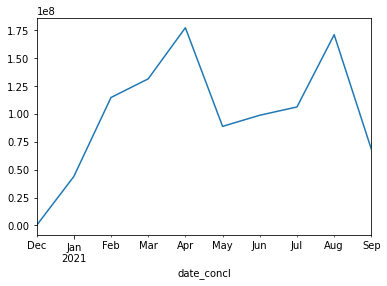

In [303]:
df_data = df_tech.groupby(pd.Grouper(key='date_concl', axis=0, 
                      freq='M')).amount.sum().plot()

C:\Users\Anna\AppData\Local\Temp\ipykernel_24472\3670536026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_food['date_concl'] = df_food['date_concl'].astype('datetime64[ns]')
c:\python38\lib\site-packages\pandas\core\arraylike.py:56: UserWarning: Parsing '31.12.2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.gt)


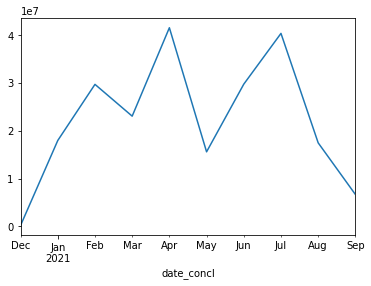

In [304]:
df_food['date_concl'] = df_food['date_concl'].astype('datetime64[ns]')
df_food = df_food[df_food.date_concl > '31.12.2020']
df_data = df_food.groupby(pd.Grouper(key='date_concl', axis=0, 
                      freq='M')).amount.sum().plot()

C:\Users\Anna\AppData\Local\Temp\ipykernel_24472\42225010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_materials['date_concl'] = df_materials['date_concl'].astype('datetime64[ns]')
c:\python38\lib\site-packages\pandas\core\arraylike.py:56: UserWarning: Parsing '31.12.2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.gt)


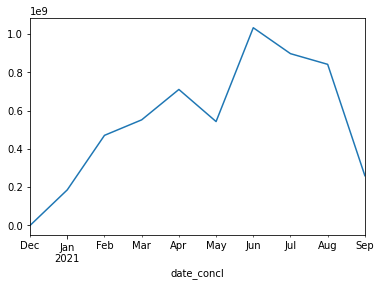

In [305]:
df_materials['date_concl'] = df_materials['date_concl'].astype('datetime64[ns]')
df_materials = df_materials[df_materials.date_concl > '31.12.2020']
df_data = df_materials.groupby(pd.Grouper(key='date_concl', axis=0, 
                      freq='M')).amount.sum().plot()